# Importing Relevant Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

# Importing dataset

In [3]:
data=pd.read_csv('Decision_Tree_ Dataset.csv')

In [4]:
data

,1,2,3,4,sum,Unnamed: 5
0,201,10018,250,3046,13515,yes
1,205,10016,395,3044,13660,yes
2,257,10129,109,3251,13746,yes
3,246,10064,324,3137,13771,yes
4,117,10115,496,3094,13822,yes
...,...,...,...,...,...,...
995,413,14914,523,4683,20533,No
996,359,14423,927,4838,20547,No
997,316,14872,613,4760,20561,No
998,305,14926,897,4572,20700,No


In [5]:
data.rename(columns={'Unnamed: 5': 'Result', '1':'Initial_Payment','2':'Last_Payment',
                    '3':'Credit_Score','4':'House_Number'}, inplace=True)

# Describing the Statistics of data

In [6]:
data.describe(include='all')

,Initial_Payment,Last_Payment,Credit_Score,House_Number,sum,Result
count,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000
unique,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,No
freq,NaN,NaN,NaN,NaN,NaN,521
mean,294.34300,12465.88400,528.042000,4027.011000,17315.280000,NaN
std,115.81539,1440.15617,259.796059,565.164179,1589.943875,NaN
min,100.00000,10005.00000,100.000000,3003.000000,13515.000000,NaN
25%,195.00000,11201.50000,302.000000,3545.000000,16073.750000,NaN
50%,289.50000,12450.00000,516.500000,4041.500000,17383.000000,NaN
75%,398.00000,13678.25000,753.500000,4507.000000,18595.250000,NaN


# Handling the missing values

In [7]:
data.isnull().sum()


Initial_Payment    0
Last_Payment       0
Credit_Score       0
House_Number       0
sum                0
Result             0
dtype: int64

# Converting categories in integers

In [8]:
data.Result.map(({'yes':1, 'no':0}))

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
995    NaN
996    NaN
997    NaN
998    NaN
999    NaN
Name: Result, Length: 1000, dtype: float64

In [9]:
cell=data.Result.map({'yes':1, 'No':0})

In [10]:
cell

0      1
1      1
2      1
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Result, Length: 1000, dtype: int64

In [11]:
data.drop(['Result'], axis=1)

,Initial_Payment,Last_Payment,Credit_Score,House_Number,sum
0,201,10018,250,3046,13515
1,205,10016,395,3044,13660
2,257,10129,109,3251,13746
3,246,10064,324,3137,13771
4,117,10115,496,3094,13822
...,...,...,...,...,...
995,413,14914,523,4683,20533
996,359,14423,927,4838,20547
997,316,14872,613,4760,20561
998,305,14926,897,4572,20700


In [12]:
data['Result']=cell

In [13]:
data

,Initial_Payment,Last_Payment,Credit_Score,House_Number,sum,Result
0,201,10018,250,3046,13515,1
1,205,10016,395,3044,13660,1
2,257,10129,109,3251,13746,1
3,246,10064,324,3137,13771,1
4,117,10115,496,3094,13822,1
...,...,...,...,...,...,...
995,413,14914,523,4683,20533,0
996,359,14423,927,4838,20547,0
997,316,14872,613,4760,20561,0
998,305,14926,897,4572,20700,0


# Visualizing the data for clarity

###### Note: I converted the categorical values to numerical values to plot he gragh

<AxesSubplot:>

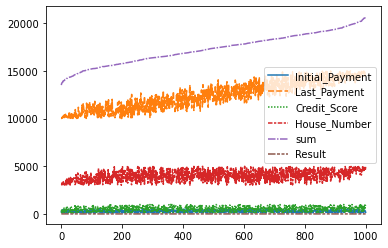

In [24]:
sns.lineplot(data=data)

<AxesSubplot:>

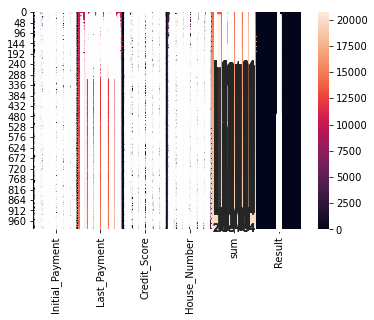

In [25]:
sns.heatmap(data, annot=True)

<AxesSubplot:xlabel='Credit_Score', ylabel='Result'>

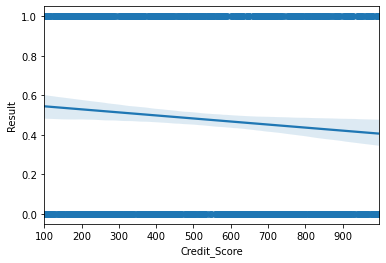

In [26]:
sns.regplot(x=data['Credit_Score'], y=data['Result'])

<AxesSubplot:xlabel='Initial_Payment', ylabel='Result'>

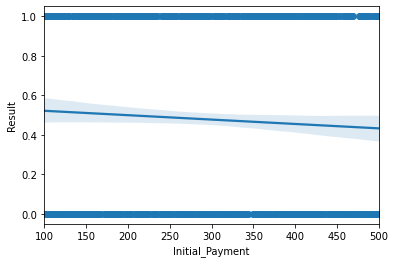

In [27]:
sns.regplot(x=data['Initial_Payment'], y=data['Result'])

<AxesSubplot:xlabel='Last_Payment', ylabel='Result'>

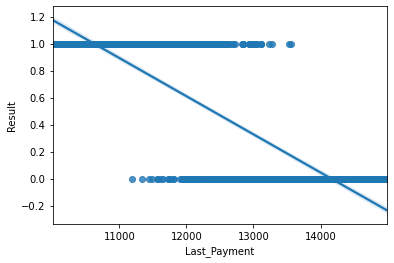

In [28]:
sns.regplot(x=data['Last_Payment'], y=data['Result'])

# Targets and Inputs

In [29]:
X=data.values[:,0:4]
y=data.values[:,5]

# Spliting the dataset into training data and testing data

In [30]:
X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=100, test_size=0.3)

###### Note: I use 70% of dataset for training and 30% for testing. (We can also use 90% and 10% or even 80% and 20%)

## Function to perform training with entropy

###### Entropy: It is the measure of randomness and unpredictibility in a dataset

In [31]:
clf_entropy= DecisionTreeClassifier(criterion='entropy', random_state=100, max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

# Making predcitions

In [32]:
y_pred= clf_entropy.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1], d

###### Note: '1' = 'Yes'  , '0' = 'No'

# Checking the accuracy

In [33]:
print( "The accuracy is", accuracy_score(y_test,y_pred)*100)

The accuracy is 93.66666666666667
